## Отчет

### Краткий обзор проблемы

Отток клиентов является одной из ключевых проблем, с которой сталкиваются многие организации. Это может привести к уменьшению доходов, ухудшению репутации и усложнению процесса привлечения новых клиентов. Поэтому важно понимать причины оттока и разрабатывать методы его предотвращения. Прогнозирование оттока клиентов является важной задачей, так как позволяет идентифицировать клиентов, склонных к уходу, и разрабатывать эффективные методы их удержания.

Оператор связи "N." хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия.

### Введение

В этом отчете представляются результаты исследования, в ходе которого была разработана модель машинного обучения для прогнозирования оттока клиентов с метрикой AUC-ROC 0.925 на тестовых данных, что на 5% выше целевого значения 0.88. Данная проблема решалась как задача бинарной классификации относится ли клиент к потенциально отточным или нет. Мы рассмотрим портрет уходящего клиента, процесс создания модели, оценим ее точность и эффективность, а также предоставим дополнительные реккомендации бизнесу.

### Данные

Данные непубличные, команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах. Информация о договорах актуальна на 1 февраля 2020. В общей сложности у нас четыре источника, содержащих информацию о договорах, персональные данные клиента, информацию об интернет-услугах и об услугах телефонии. Во все датасетах столбец customerID содержит уникальный код клиента. В датасете договоров содержатся следующие признаки: дата заключения догвора, дата расторжения догвора, тип оплаты, форма расчета, способ оплаты, ежемесячные траты на услуги, общая сумма затрат на услуги. В датасете персональных данных содержатся следующие признаки: пол клиента, наличие пенсионного статуса по возрасту, наличие супруга(и), наличие иждивенцев. В датасете интернет-услуг содержатся следующие признаки: тип подключения, подключена ли блокировка небезопасных сайтов, подключено ли облачное хранилище файлов для резервного копирования данных, подключен ли антивирус, подключена ли выделенная линия технической поддержки, подключено ли стриминговое телевидение, подключен ли каталог фильмов. В датасете услуг телефонии содержится признак наличия возможности ведения параллельных линий во время звонка. Данные были объеденены по уникальному кода клиента. Предварительно была проведена проверка данных на несоответствие кодов клиента.

### Feature engineering & selection & Preprocessing

Для улучшения качества моделей были сгенерированы следующие признаки: целевой бинарный признак (ушел ли клиент), срок использования услуг оператара (в месяцах и днях), разница стоимости полного оплаченного периода и прошедшего, а также пользовался ли клиент услугами телефонии, интернета и ими обоими.

Даты удалялись во избежание утечки таргета, что может привести к сильнейшему переобучению моделей. Код клиента удаляется за ненадобностью. Все бинарные признаки кодируются нулем и единицей.

Были проанализированы мультиколлинеарность признаков и их корреляция с таргетом при помощи 𝜙k-корреляции [[1]](#refferences). В итоге были протестированы три выборки признаков - без мультиколлинеарности, без мультиколлинеарности и с высокой корреляцией с таргетом и полное пространство признаков. Почти на всех моделей наилучший результат давало обучение на полном наборе признаков.

Предобработка для моделей, которые не могут работать с категориальными переменными, производилась путем построения пайплайна. Для линейных моделей - масштабирование числовых переменных с помощью StandardScaler и OneHot кодирование [[2]](#refferences) для категориальных переменных. Для моделей на основе деревьев принятия решения только Ordinal кодирование [[2]](#refferences) для категориальных переменных.

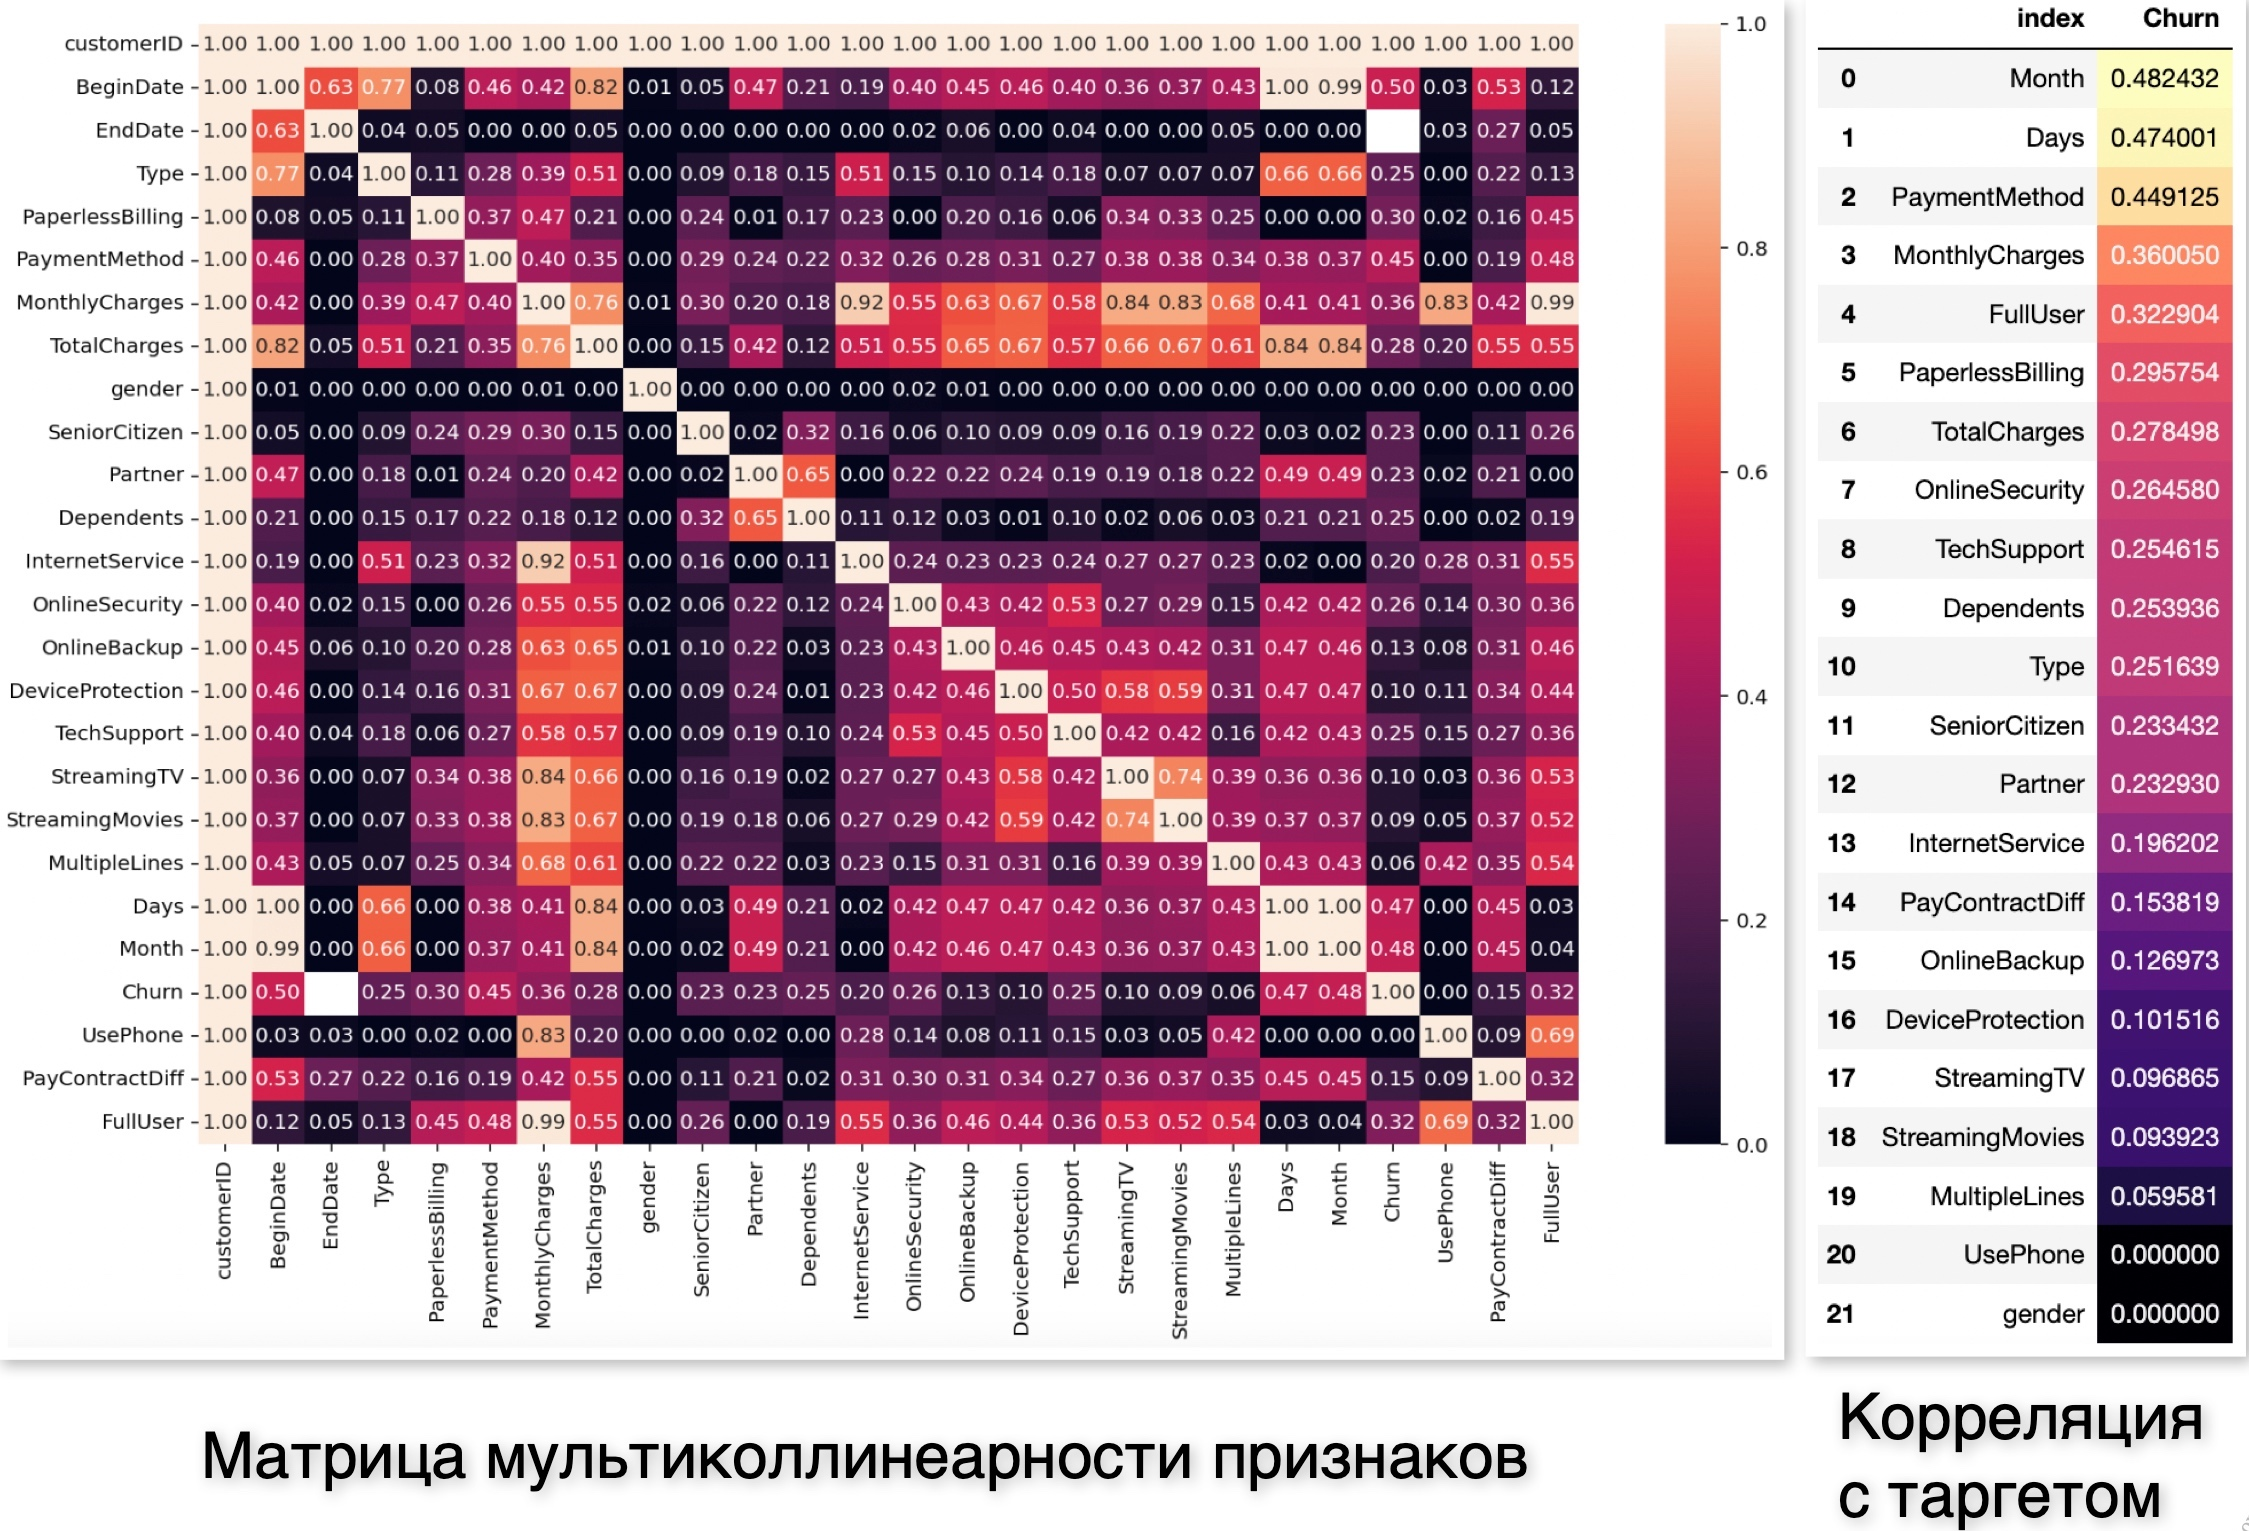

### Методы и модели

В этом проекте мы тестируем семь моделей машинного обучения классификации: логистическая регрессия, гребневый классификатор, машина опорных векторов (SVM), метод k-ближайших соседей, многослойный перцептрон, случайный лес и градиентный бустинг на деревьях принятия решения. Использовались имплементации библиотек Scikit-learn [[3]](#refferences), TensorFlow/Keras [[4]](#refferences), Catboost [[5]](#refferences).

Логистическая регрессия [[6]](#refferences) является популярным методом бинарной классификации с использованием табличных данных. В задаче бинарной классификации логистическая регрессия моделирует $p(y=1|x;\theta)$ как сигмоидальную функцию входных признаков как $p(y=1|x;\theta) = \frac{1}{1+exp(\theta^Tx)}$. Классификация может быть определена по границе принятия решения $p(y=1|x) > C$, где $C$ - заранее определенный порог (обычно $C=0.5$).
Логистическая регрессия проста для интерпретации, но обычно ограничена в обнаружении нелинейных взаимосвязей.

Гребневый классификатор - это модификация гребневой регрессии [[7]](#refferences) [[8]](#refferences), которая отличается от линейной регрессии тем, что в простейшем случае проблема почти сингулярной матрицы моментов ${\displaystyle (\mathbf {X} ^{\mathsf {T}}\mathbf {X} )}$ облегчается добавлением положительных элементов к диагоналям, тем самым уменьшая ее условное число. По аналогии с обычным оценщиком по методу наименьших квадратов, простой гребневой оценщик имеет вид ${\displaystyle {\hat {\beta }}_{R}=(\mathbf {X} ^{\mathsf {T}}\mathbf {X} +\lambda \mathbf {I} )^{-1}\mathbf {X} ^{\mathsf {T}}\mathbf {y} }$, где $\mathbf {y}$ - целевой признак, ${\displaystyle \mathbf {X} }$ - матрица признаков, ${\displaystyle \mathbf {I}}$ - единичная матрица, а параметр гребня ${\displaystyle \lambda \geq 0}$ служит константой, сдвигающей диагонали матрицы моментов. Классификатор же принимает отрицательный выход гребневого регрессора за нулевой класс, а положительный за первый. Базовая реализация гребневого классификатора в библиотеке Scikit-learn не поддерживает получением скоров (условно, вероятностей) класса, поэтому для адекватного использования метрики AUC-ROC были внесены небольшие изменения - выход решающей функции умножается на -1 для формирования двумерного массива, к которому применяется функция $softmax$. Основное преимущество гребневого классификатора перед логистической регрессией в том, что он значительно лучше справляется с мультиколлинеарностью и избыточностью признаков.

Классификатор SVM [[9]](#refferences) преобразует входные признаки в высокоразмерное пространство признаков путем введения отображения (линейного или нелинейного) через ядро. При обучении классификатора SVM использует только связанные точки опорного вектора в пространстве признаков, чтобы найти оптимальную разделяющую гиперплоскость. Одним из популярных вариантов ядра является гауссовское ядро $k({\mathbf  {x}},{\mathbf  {x}}')=\exp \left(-{\frac  {\|{\mathbf  {x}}-{\mathbf  {x'}}\|^{2}}{2\sigma ^{2}}}\right)$, которое имеет меньше параметров, чем другие ядра. Для бинарной для задачи бинарной классификации вероятностный вывод может быть получен следующим образом $p(y_j=1|x;\theta) = \frac{1}{1+exp(\sum\limits_{i=1}^m y_i a_i K(x_i, x_j)+b)}$. <br> 
Для данной задачи был включаен параметр probability = True, чтобы получить оценки вероятностного типа. 

Метод k-ближайших соседей (k-NN) - это непараметрический метод обучения с подкреплением, впервые разработанный Эвелин Фикс и Джозефом Ходжесом в 1951 году,[[10]](#refferences) а затем расширенный Томасом Ковером.[[11]](#refferences) Он используется для классификации и регрессии. Входные данные состоят из k ближайших обучающих примеров в наборе данных. При классификации k-NN выходом является принадлежность к классу. Объект классифицируется путем множественного голосования его соседей, при этом объект относится к классу, наиболее распространенному среди k ближайших соседей (k - целое положительное число, обычно небольшое). Если k = 1, то объекту просто присваивается класс единственного ближайшего соседа.

Многослойный перцептрон (Розенблатт 1958, Румельхарт 1986) сегодня достаточно редко применяется на табличных данных. В данном случае использовался перцептрон с тремя скрытыми слоями с нелинейными функциями активации, выходной нейрон с сигмоидальной функцией активации для бинарной классификации.

Метод случайного леса был введен Брейманом [[12]](#refferences) сочетает в себе две основные идеи: метод бэггинга Бреймана и метод случайных подпространств, предложенный Тин Кам Хо. Основная идея заключается в использовании большого ансамбля решающих деревьев, каждое из которых само по себе даёт очень невысокое качество классификации, но за счёт их большого количества результат получается хорошим. Метод случайных лесов имеет ряд преимуществ, таких как способность улавливать нелинейную границу между классами, отсутствие специальной обработки входных признаков, пригодность для несбалансированных данных
классификации и т.д.

Метод градиентного бустинга был предложен Фридманом [[13]](#refferences) [[14]](#refferences) и позже был усовершенствован до стохастического градиентного бустинга с помощью метода бэггинга. Целью методов бустинга является последовательное построение последовательности слабых классификаторов, а затем их объединение посредством
взвешенного большинства голосов для получения окончательного прогноза. Данный алгоритм является один из самых используюмых на табличных данных, так как обычно показывает лучший результат, чем случайный лес.

Подбор гиперпараметров моделей для линейных моделей производиться путем перебора параметров по сетке и усреднением результата кросс-валидации интсрументом GridSearchCV. Для многослойного перцептрона, случайного леса и градиентного бустинга на деревьях принятия решения для подбора оптимальных гиперпараметров применяется алгоритм  TPE (Tree-structured Parzen Estimator) [[15]](#refferences) [[16]](#refferences). Используется импелентация алогритма из библиотеки optuna [[17]](#refferences)

Производительность моделей сравнивается по ROC-AUC (площадь под ROC-кривой [[18]](#refferences))
на тестовой выборке. Классификатор, получивший наибольший показатель AUC, считается лучшим. Модели также будут сравниваться с целевым значением метрики, чтобы показать достаточноть или недостаточность качества модели, чтобы отвечать запросу заказчика.

### Результаты

Наилучший результат на тестовых данных показала модель градиентного бустинга на деревьях принятия решения с использованием библиотеки catboost и оптимизацией гиперпараметров с использованием библиотеки optuna на полном протранстве признаков.

Гиперпараметры модели:
- `iterations`: 1435
- `learning_rate`: 0.08977500063380385
- `depth`: 2
- `l2_leaf_reg`: 0.00012195157861034205
- `random_strength`: 1.366061255773561
- `bagging_temperature`: 0.004871406106434865
- `min_data_in_leaf`: 83
- `max_leaves`: 635
- `od_wait`: 12
- `grow_policy`: Lossguide
- `loss_function`: Logloss
- `od_type`: IncToDec
- `bootstrap_type`: Bayesian
- `random_seed`: 231222

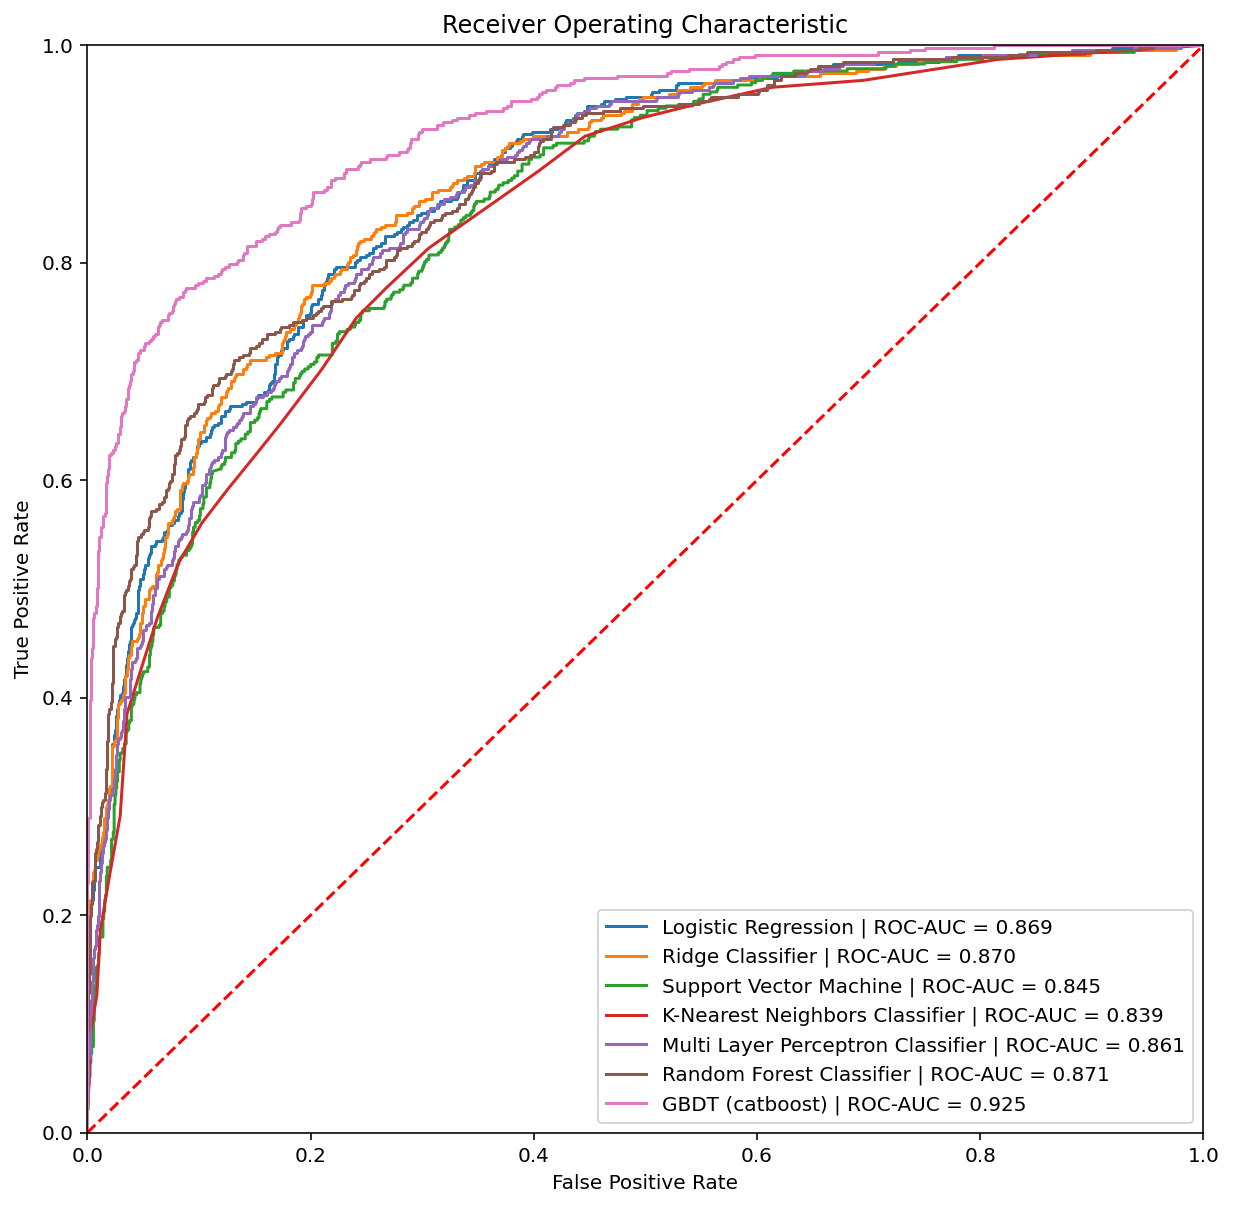

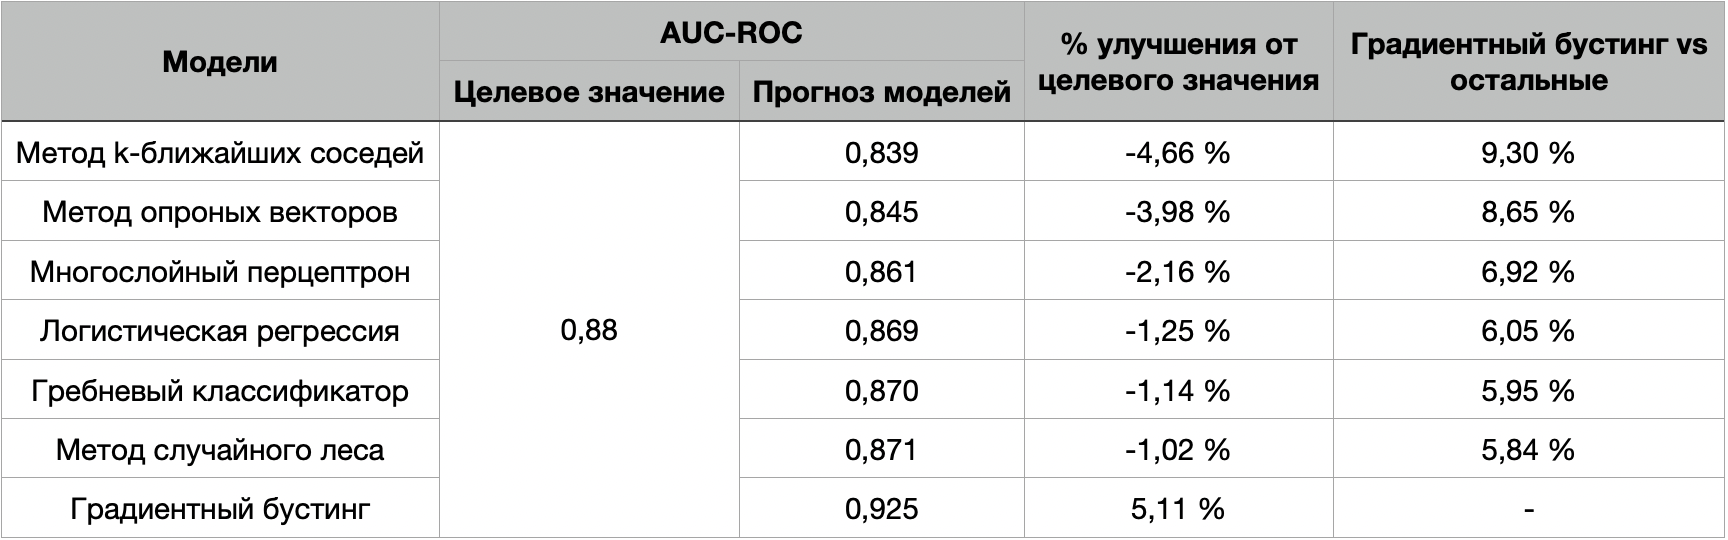

Основная метрика AUC-ROC лучшей модели на тестовых данных равна 0.925, что на 5% выше целевого порога 0.88. Дополнительная метрика accuracy (точность) равна 0.891 и достигается при стандартном пороге бинаризации 0.5, что говорит о хорошо настроенной модели.

В дальнейшем, путем настройки порога бинаризации скоров предсказания модели можно выбирать допустимые значения ошибок первого и второго рода в зависимости от бизнес задач. Если снизить порог, модель будет находить больше потенциально отточных клиентов, однако и ложноположительных срабатываний будет больше. Если повысить порог, наоборот, модель будет реже ложно определять активных клиентов как уходящих, но и ложноотрицательных результатов будет больше. Фактически, это параметр чувствительности модели. К примеру, исходя из графика ROC-кривой, если модель будет находить 70% отточных клиентов, то около 5-6% активных клиентов будут ошибочно помечаться как уходящие, если же модель будет обнаруживать 80% отточных клиентов, то процент активных клиентов ошибочно опредленных как уходящие выростет примерно до 14%.

Ниже демонстрируется матрицы ошибок при выборе порогов 0.45, 0.5 и 0.55:

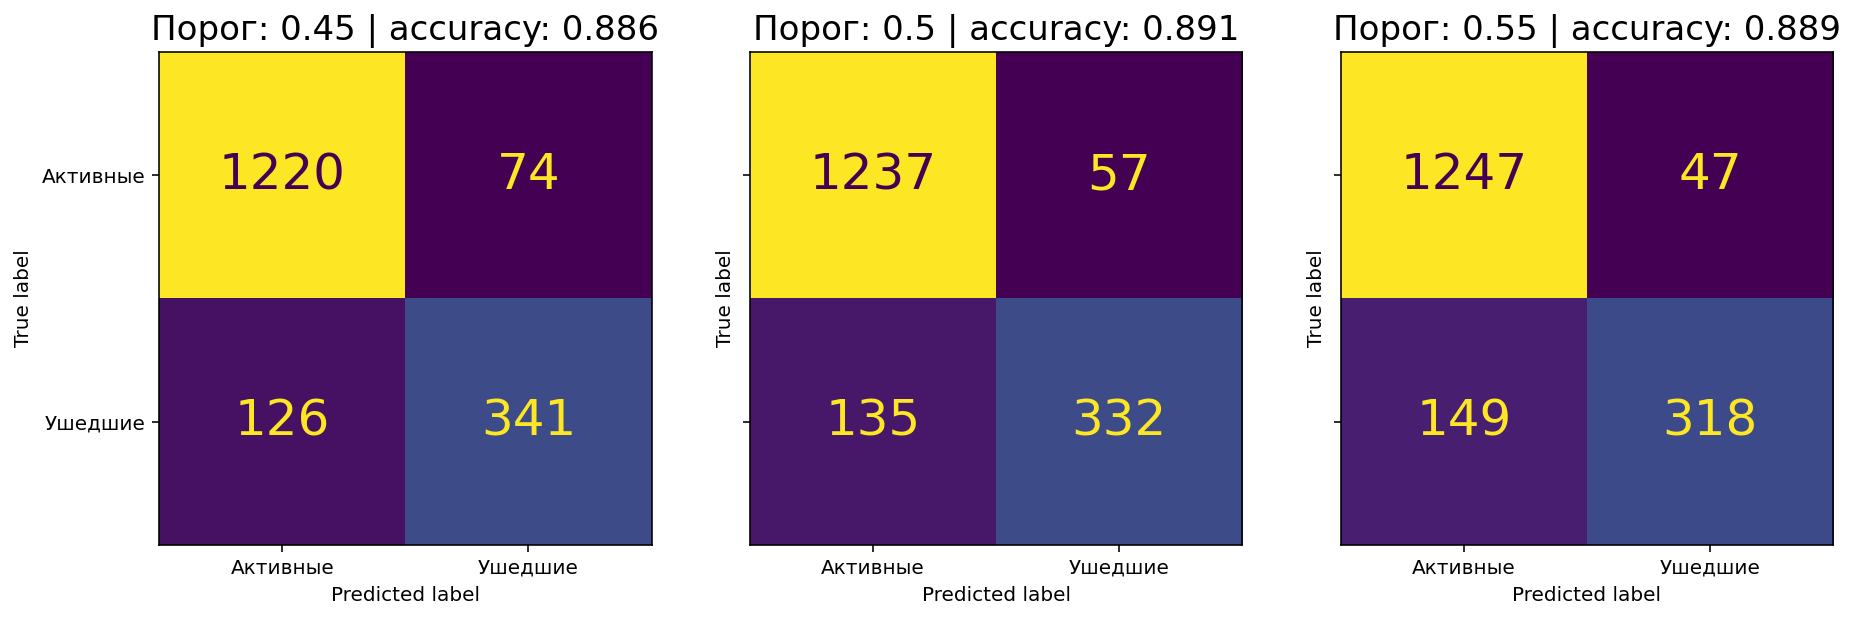

### Портерт уходящего клиента

После анализа данных и модели составлен общий портрет уходящего клиента:

Сильные зависимости (договор, срок, опалата и тип интернета):
- Клиент недавно заключил договор на обслуживание (менее 20 месяцев назад)
- Клиент пользуется интернетом с подключением через оптоволоконный кабель (или с меньшей вероятностью через телефонную линию)
- Заключен договор на помесячную оплату
- Ежемесячные траты на услуги выше 60 единиц при подлюченном оптоволоконном кабеле, либо меньше 50 при использовании интернета серез телефонную линию.

Средние зависимости (расчет и услуги):
- Оплачивает услуги электронным чеком
- Расчет происходит безналично
- Клиент НЕ пользуется услугами блокировки небезопасных сайтов, услугами телефониии и выделенной линией технической поддержки
- Клиент пользуется каталогом фильмов стримминга и возможностью подключения телефонного аппарата к нескольким линиям одновременно.

Слабые зависимоти (персональные данные):
- Клиент - мужчина
- Клиент имеет пенсионный статуса по возрасту
- Клиент не замужем/не женат
- Клиент не имеет несовершеннолетних детей (или других иждивенцев)

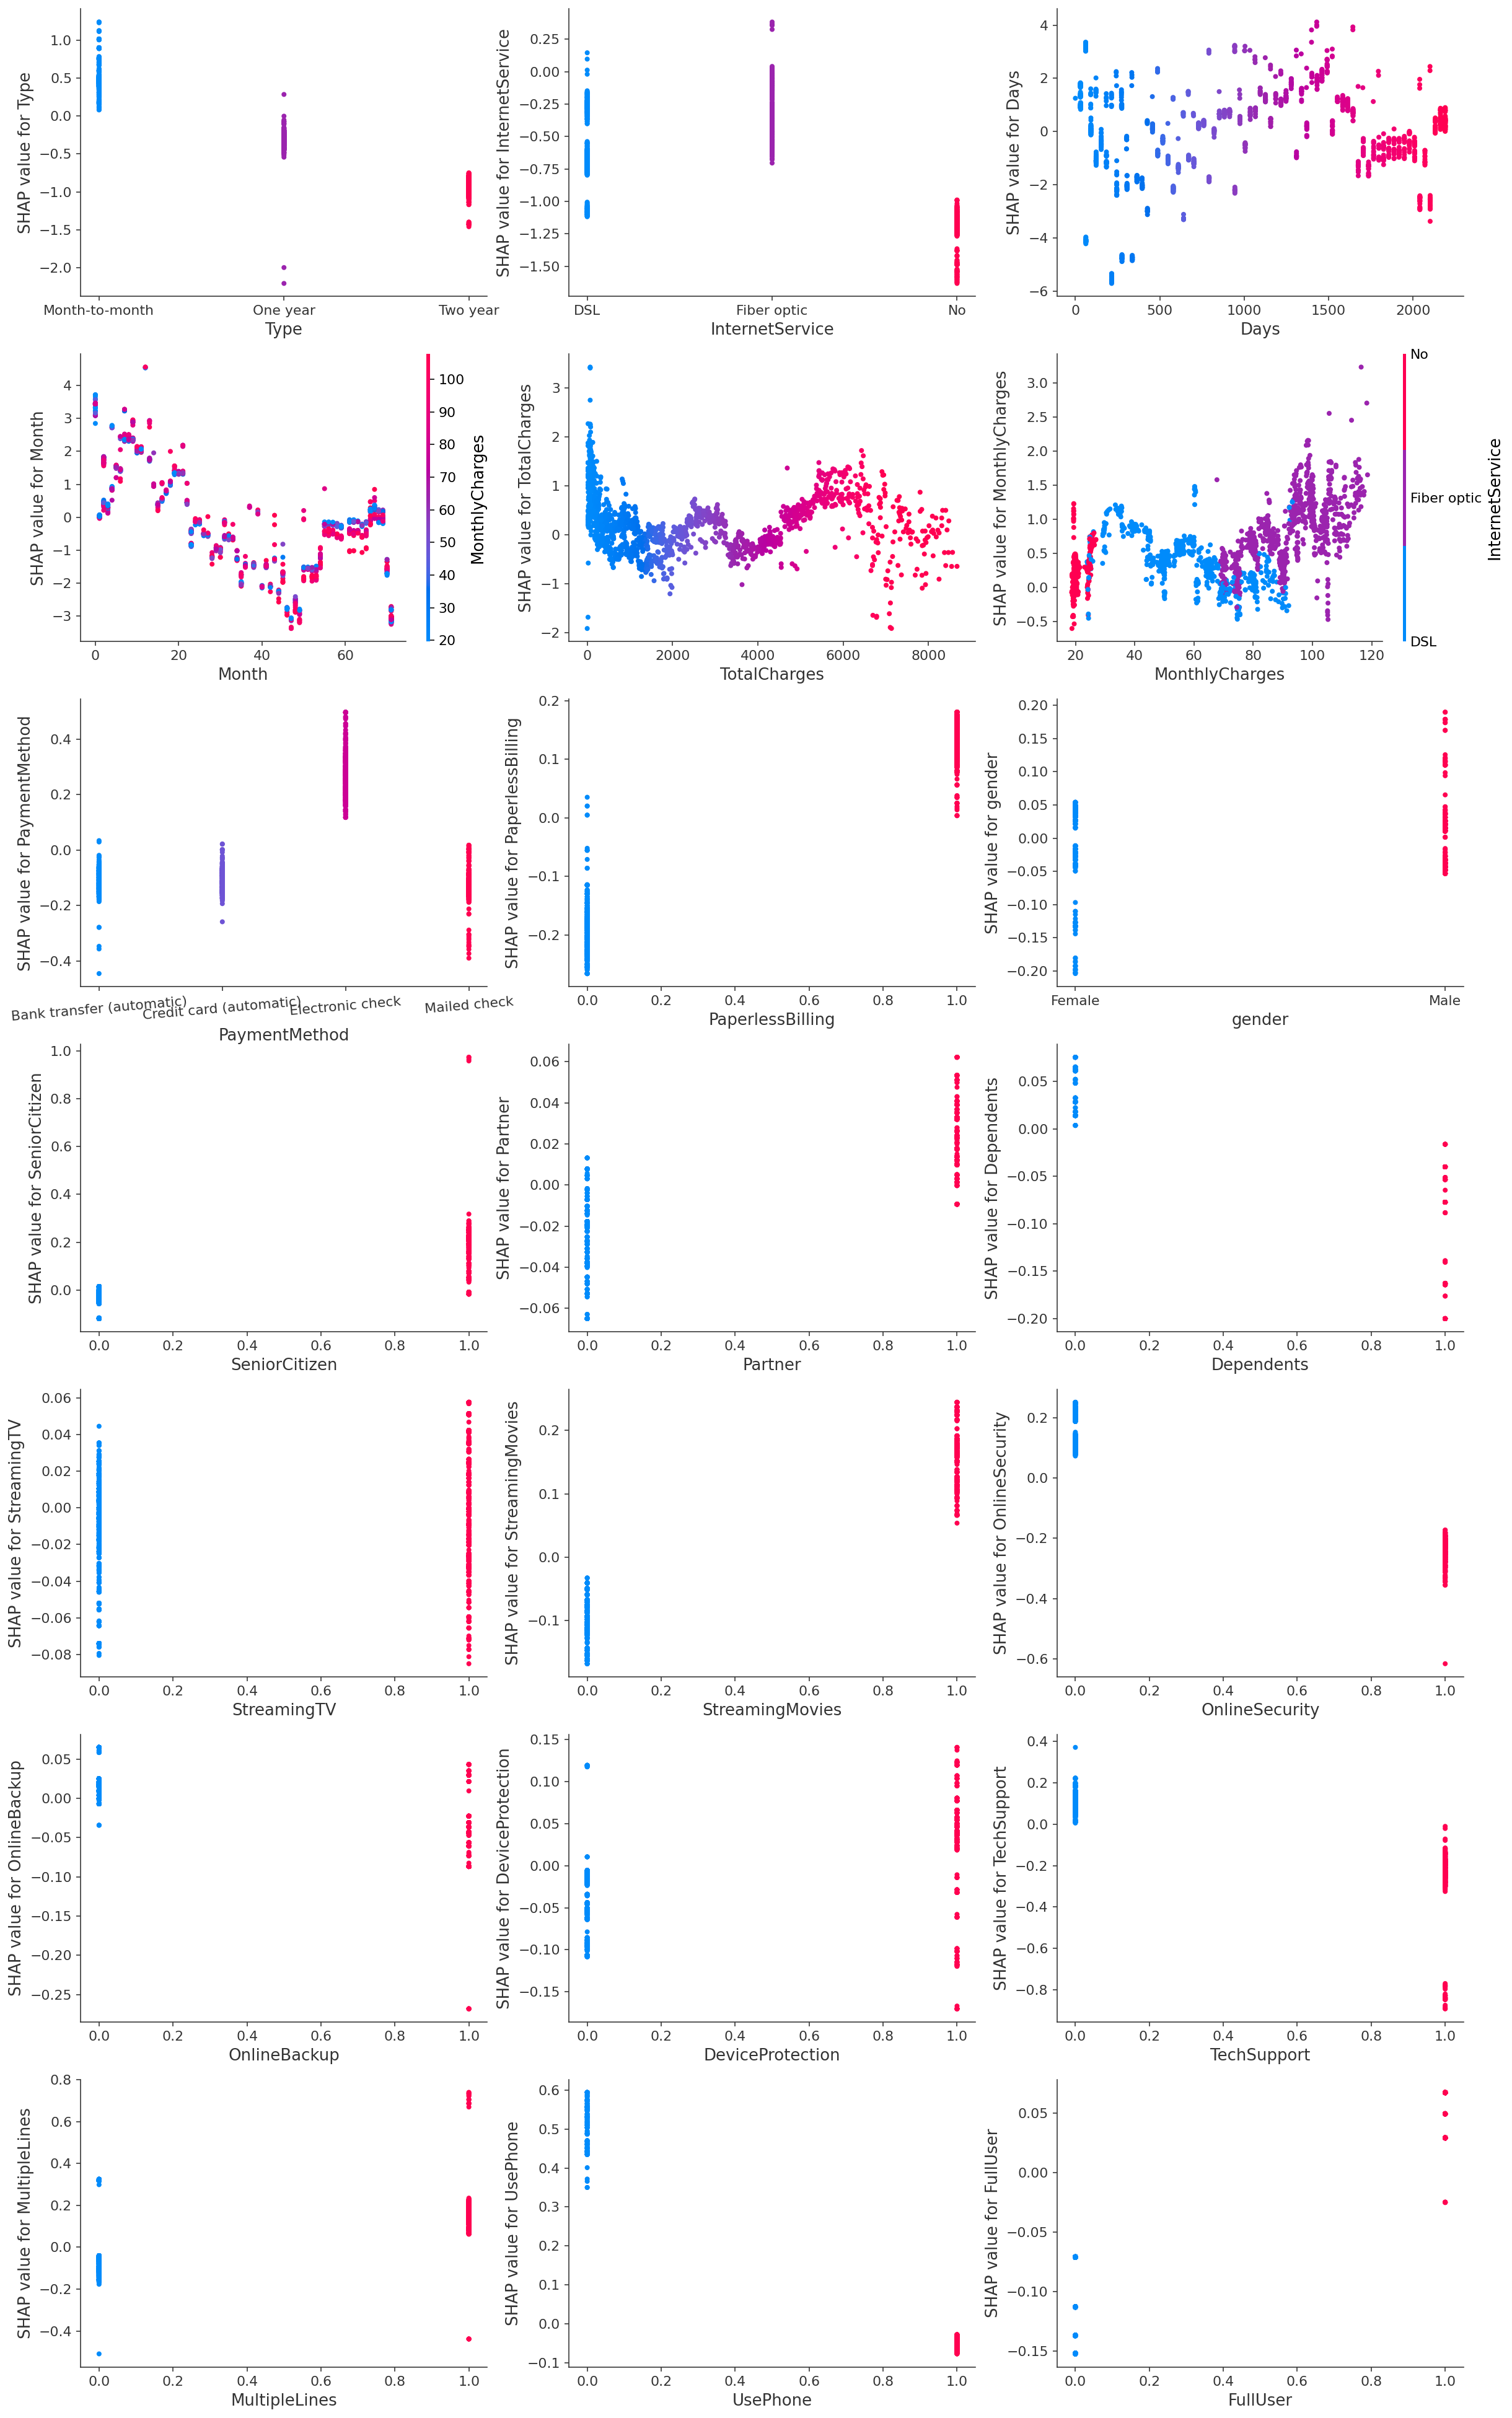

### Рекомендации

Помимо поиска спобов по удержанию клиентов и их применению, имеет смысл обратить внимание на предоставляемые услуги интернет связи, так как от них в большой степени зависит лояльность клиента: подключение по оптоволоконному кабелю сильно повышает вероятность оттока клиента, как и, в меньшей степени, интрнет подключение по телефонной линии. Возможно это связано с ценовой политикой или качеством предоятавляемой услуги. В любом случае, стоит обратить на это внимание.

Во вторую очередь, можно рекомендовать дополнительно проанализировать услуги стримминга фильмов и подключения телефонного аппарата к нескольким линиям одновременно, так как они имеют такую же отрицательную зависимость, хоть и в меншей степени.

### Ссылки
<a id='refferences'></a>
1. [Препроцессинг данных (библиотека Scikit-learn)](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler)
2. [Библиотека phik (𝜙k-корреляция)](https://towardsdatascience.com/phik-k-get-familiar-with-the-latest-correlation-coefficient-9ba0032b37e7)
3. [Библиотека Scikit-learn](https://scikit-learn.org/stable/)
4. [Библиотека TensorFlow/Keras](https://www.tensorflow.org/)
5. [Библиотека Catboost](https://catboost.ai/)
6. Cramer, J. S. (2002). The origins of logistic regression (Technical report). Vol. 119. Tinbergen Institute. pp. 167–178. doi:[10.2139/ssrn.360300](https://doi.org/10.2139%2Fssrn.360300).
7. Hoerl, Arthur E.; Kennard, Robert W. (1970). "Ridge Regression: Biased Estimation for Nonorthogonal Problems". Technometrics. 12 (1): 55–67. doi:[10.2307/1267351](https://doi.org/10.2307%2F1267351). JSTOR [1267351](https://www.jstor.org/stable/1267351).
8. Hoerl, Arthur E.; Kennard, Robert W. (1970). "Ridge Regression: Applications to Nonorthogonal Problems". Technometrics. 12 (1): 69–82. doi:[10.2307/1267352](https://doi.org/10.2307%2F1267352). JSTOR [1267352](https://www.jstor.org/stable/1267352).
9. Cortes, Corinna; Vapnik, Vladimir (1995). "Support-vector networks" (PDF). Machine Learning. 20 (3): 273–297. doi:[10.1007/BF00994018](https://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.15.9362). S2CID [206787478](https://api.semanticscholar.org/CorpusID:206787478).
10.  Fix, Evelyn; Hodges, Joseph L. (1951). Discriminatory Analysis. Nonparametric Discrimination: Consistency Properties [(PDF)](https://apps.dtic.mil/dtic/tr/fulltext/u2/a800276.pdf) (Report).
11.  Cover, Thomas M.; Hart, Peter E. (1967). "Nearest neighbor pattern classification". IEEE Transactions on Information Theory. 13 (1): 21–27. doi:[10.1109/TIT.1967.1053964](https://doi.org/10.1109%2FTIT.1967.1053964).
12. Breiman, Leo. Random Forests // Machine Learning : journal. — 2001. — Vol. 45, no. 1. — P. 5—32. — doi:[10.1023/A:1010933404324](https://dx.doi.org/10.1023%2FA%3A1010933404324). 
13. Friedman, J. H. (February 1999). "Greedy Function Approximation: A Gradient Boosting Machine" [(PDF)](https://translated.turbopages.org/proxy_u/en-ru.ru.ad2a5aa7-63ac940c-112bd2dc-74722d776562/https/statweb.stanford.edu/~jhf/ftp/trebst.pdf).
14. Friedman, J. H. (March 1999). "Stochastic Gradient Boosting" [(PDF)](https://translated.turbopages.org/proxy_u/en-ru.ru.ad2a5aa7-63ac940c-112bd2dc-74722d776562/https/statweb.stanford.edu/~jhf/ftp/stobst.pdf).
15. [Multiobjective tree-structured parzen estimator for computationally expensive optimization problems](https://dl.acm.org/doi/10.1145/3377930.3389817)
16. [Multiobjective Tree-Structured Parzen Estimator](https://doi.org/10.1613/jair.1.13188)
17. [Библиотека optuna](https://optuna.org/)
18. Bradley, A.P., 1997. The use of the area under the ROC curve in the evaluation of machine learning algorithms. Pattern Recogn. 30 (7), 1145–1159. [(PDF)](https://cse.hkust.edu.hk/nevinZhangGroup/readings/yi/Bradley_PR97.pdf)